# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [7]:
%matplotlib notebook

import logging

from matplotlib import pyplot as plt
from helper import *
logging.basicConfig(level=logging.INFO)
plt.style.use('seaborn-darkgrid')

df_ecdc = ecdc()
logging.info('ECDC: \n%s', df_ecdc.columns)

df_at = at()
logging.info('AT: \n%s', df_at.columns);

INFO:root:ECDC: 
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
INFO:root:AT: 
Index(['time', 'tägliche Erkrankungen', 'Timestamp', 'weekday'], dtype='object')


## Comparison - number of cases

<IPython.core.display.Javascript object>


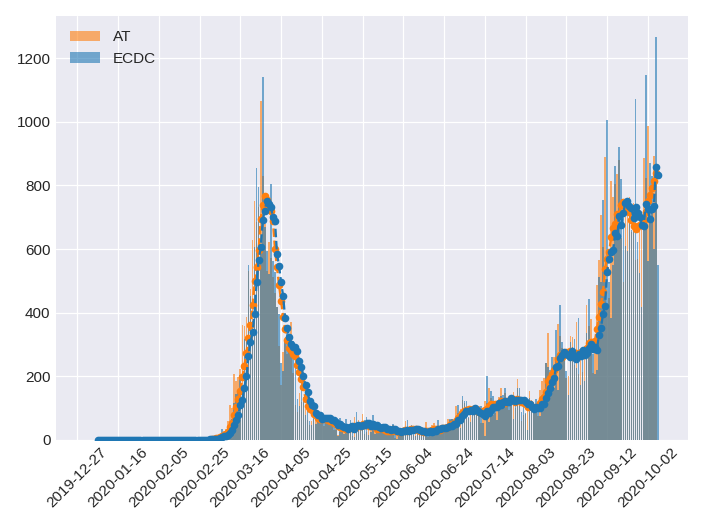

In [8]:
f,ax = plt.subplots()
# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax.plot(df_at.time, df_at['tägliche Erkrankungen'].rolling(7).mean(),  marker='o', markersize=4, linestyle='--', color='C1')

ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='AT',  alpha=0.6, color='C1')
selection = df_ecdc[df_ecdc.geoId=='AT'].sort_values(by=['year','month','day'], ascending=True)
ax.bar(selection.dateRep, selection['cases'],label='ECDC',  alpha=0.6, color='C0')
ax.plot(selection.dateRep, selection['cases'].rolling(7).mean(), marker='o', markersize=4, linestyle='--',color='C0')
# plt.yscale('log')

ax.xaxis.set_major_locator(plt.MaxNLocator(20));

plt.xticks(rotation=45);
plt.legend(loc='best')
plt.tight_layout()



In [9]:
df_at['tägliche Erkrankungen'].sum(), df_ecdc[df_ecdc.geoId=='AT'].cases.sum()


(50915, 50435)

In [10]:
df_ecdc[df_ecdc.geoId=='AT'].sort_values('dateRep')[['dateRep', 'cases', 'deaths','popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' ]].tail(6)

,dateRep,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2541,2020-10-02,564,3,8858775.0,112.284148
2540,2020-10-03,872,1,8858775.0,112.859848
2539,2020-10-04,830,6,8858775.0,113.683890
2538,2020-10-05,599,4,8858775.0,113.571007
2537,2020-10-06,1268,5,8858775.0,121.190571
2536,2020-10-07,549,22,8858775.0,118.955499


In [11]:
df_at.sort_values('time').tail(5)

,time,tägliche Erkrankungen,Timestamp,weekday
220,2020-10-02,986,2020-10-07T14:02:01,4
221,2020-10-03,703,2020-10-07T14:02:01,5
222,2020-10-04,713,2020-10-07T14:02:01,6
223,2020-10-05,893,2020-10-07T14:02:01,0
224,2020-10-06,860,2020-10-07T14:02:01,1


In [12]:
df_at.agg(
        {'tägliche Erkrankungen': ['sum', last_7_days_sum,  rolling_avg, latest,  'max' ],
        'time': ['min', 'max']} )


,tägliche Erkrankungen,time
last_7_days_sum,5866.0,NaT
latest,860.0,NaT
max,1065.0,2020-10-06
min,NaN,2020-02-25
rolling_avg,838.0,NaT
sum,50915.0,NaT
